In [3]:
## import packages and load data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
%matplotlib inline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso#Loading the dataset

 
df = pd.read_excel("all.xlsx")
df['class'] = df['class'].apply(lambda x:1 if(x=="yes") else 0).astype(int)
df

,L1-dcache-load-misses,L1-dcache-loads,L1-dcache-prefetch-misses,L1-dcache-store-misses,L1-dcache-stores,L1-icache-load-misses,LLC-loads,LLC-prefetches,LLC-stores,branch-instructions,...,dTLB-load-misses,dTLB-loads,dTLB-store-misses,dTLB-stores,iTLB-load-misses,iTLB-loads,instructions,ref-cycles,stalled-cycles-frontend,class
0,1119222,87926484,1043165,4903,25751352,59469,8945,30687,4232,49789017,...,16556,91260226,1211,25575611,1949,191,196881154,300352090,76432996,1
1,1123020,96163086,1107903,4198,25738341,6437,7727,24963,1628,51464455,...,3354,96397954,274,26084246,485,200,200282092,306308034,76319524,1
2,1118275,96069790,1097494,4811,26451199,7183,8587,31986,1609,51553178,...,3284,96098384,272,26127294,477,189,200790789,305352605,74351280,1
3,1121089,95507856,1100315,4837,27192605,6541,7630,22503,1550,51693771,...,3425,94128726,279,25803097,467,199,202828734,306172910,75247434,1
4,1130473,96942359,1090079,4779,26919249,6549,6044,26008,1590,52222798,...,3271,95625085,280,26179743,481,194,201688992,306104705,75755796,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,7144,55866,555,2775,38898,6739,2268,162,2158,36969,...,682,45385,90,39223,122,9,160442,629312,453925,0
6593,6282,47119,656,2951,45804,10303,3116,281,2100,31915,...,744,45099,96,39033,117,4,156953,562048,540575,0
6594,6437,48717,613,2769,39330,6780,2288,252,2286,32704,...,801,48142,104,41087,122,3,154967,574848,551127,0
6595,6496,48950,675,3025,40247,6955,2220,258,2255,33177,...,769,47856,92,40645,116,7,151628,535744,484313,0


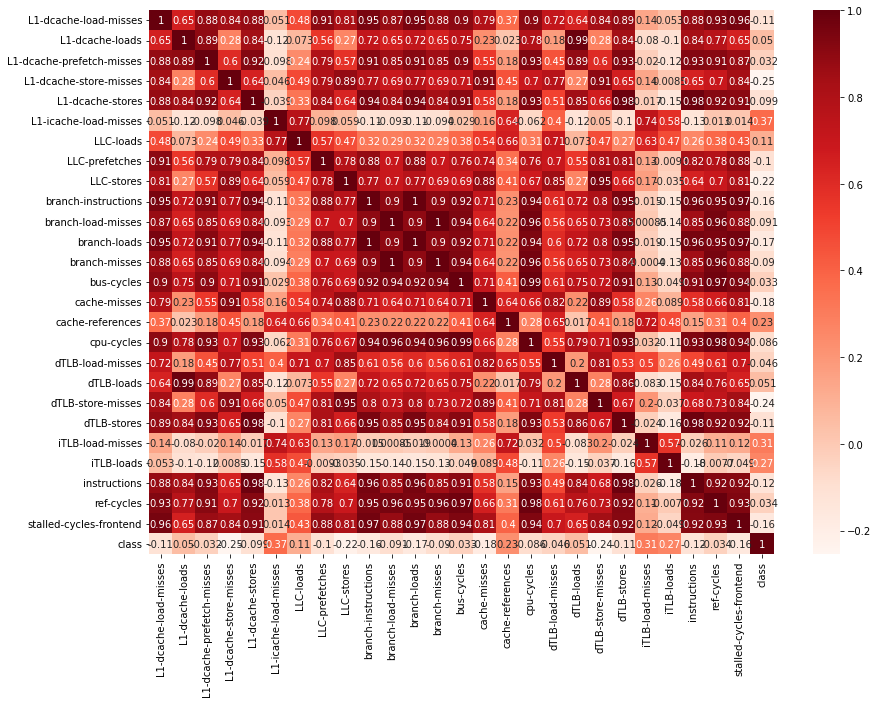

In [5]:
#Using Pearson Correlation
plt.figure(figsize=(14,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show() 
# 從圖中便發現各個x變數與y(class)的相關係數都很小

In [6]:
#Correlation with output variable
cor_target = abs(cor["class"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0]
relevant_features #難以用相關係數來挑選特徵 (都太小)

L1-dcache-load-misses        0.113389
L1-dcache-loads              0.050498
L1-dcache-prefetch-misses    0.031839
L1-dcache-store-misses       0.253912
L1-dcache-stores             0.098758
L1-icache-load-misses        0.369858
LLC-loads                    0.112911
LLC-prefetches               0.103699
LLC-stores                   0.223938
branch-instructions          0.164860
branch-load-misses           0.091491
branch-loads                 0.165659
branch-misses                0.090031
bus-cycles                   0.033007
cache-misses                 0.177170
cache-references             0.228733
cpu-cycles                   0.086110
dTLB-load-misses             0.046229
dTLB-loads                   0.050978
dTLB-store-misses            0.242121
dTLB-stores                  0.106902
iTLB-load-misses             0.308533
iTLB-loads                   0.266644
instructions                 0.119819
ref-cycles                   0.033991
stalled-cycles-frontend      0.157494
class       